# DSC 630 - Week 6
## Milestone 3
### Ashley Deibler

### Exploratory Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings as wr

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/diggy/DSC630-Deibler/dat_species.csv')

df.head()

,occurrence,sciname,kingdom,group,family,state,nativeregion,centroid,decimalLat,decimalLon,dateobserved,year,collector,recordedBy,huc8skm,huc10skm,huc12skm
0,2060509,Phalaris arundinacea,Plant,NaN,NaN,Maine,"North America, Europe, possibly native",N,47.2396,-68.5607,1914-07-19 00:00:00,1914,New England Botanical Club Ralph Carleton Bean,NaN,2304.01,348.02554,52.617274
1,2060863,Phalaris arundinacea,Plant,NaN,NaN,Maine,"North America, Europe, possibly native",N,47.2396,-68.5607,1914-07-18 00:00:00,1914,Yale university Herbarium Richard William Woo...,NaN,2304.01,348.02554,52.617274
2,2060506,Phalaris arundinacea,Plant,NaN,NaN,Maine,"North America, Europe, possibly native",N,47.2396,-68.5607,1904-07-14 00:00:00,1904,Harvard University Economic Herbarium of Oakes...,NaN,2304.01,348.02554,52.617274
3,2060507,Phalaris arundinacea,Plant,NaN,NaN,Maine,"North America, Europe, possibly native",N,47.2396,-68.5607,1903-07-15 00:00:00,1903,New England Botanical Club Arthur Stanley Pease,NaN,2304.01,348.02554,52.617274
4,2060505,Phalaris arundinacea,Plant,NaN,NaN,Maine,"North America, Europe, possibly native",N,47.2396,-68.5607,1903-07-08 00:00:00,1903,Harvard University Gray Herbarium Albert Hanf...,NaN,2304.01,348.02554,52.617274


## Analyze Data

In [3]:
df.shape

(313996, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313996 entries, 0 to 313995
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   occurrence    313996 non-null  int64  
 1   sciname       313996 non-null  object 
 2   kingdom       313996 non-null  object 
 3   group         158984 non-null  object 
 4   family        158984 non-null  object 
 5   state         313996 non-null  object 
 6   nativeregion  155012 non-null  object 
 7   centroid      313996 non-null  object 
 8   decimalLat    313996 non-null  float64
 9   decimalLon    313996 non-null  float64
 10  dateobserved  154352 non-null  object 
 11  year          313996 non-null  int64  
 12  collector     313996 non-null  object 
 13  recordedBy    18150 non-null   object 
 14  huc8skm       313996 non-null  float64
 15  huc10skm      313996 non-null  float64
 16  huc12skm      313996 non-null  float64
dtypes: float64(5), int64(2), object(10)
memory usage

#### Check columns

In [5]:
df.columns.tolist()

['occurrence',
 'sciname',
 'kingdom',
 'group',
 'family',
 'state',
 'nativeregion',
 'centroid',
 'decimalLat',
 'decimalLon',
 'dateobserved',
 'year',
 'collector',
 'recordedBy',
 'huc8skm',
 'huc10skm',
 'huc12skm']

#### Check Missing Values

In [6]:
df.isnull().sum()

occurrence           0
sciname              0
kingdom              0
group           155012
family          155012
state                0
nativeregion    158984
centroid             0
decimalLat           0
decimalLon           0
dateobserved    159644
year                 0
collector            0
recordedBy      295846
huc8skm              0
huc10skm             0
huc12skm             0
dtype: int64

#### Check Duplicate Values

In [7]:
df.nunique()

occurrence      312982
sciname            332
kingdom              2
group               21
family              80
state               62
nativeregion        47
centroid             3
decimalLat       98252
decimalLon      103685
dateobserved     13809
year               173
collector         1415
recordedBy        1981
huc8skm           1968
huc10skm          9414
huc12skm         19074
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100

occurrence       0.000000
sciname          0.000000
kingdom          0.000000
group           49.367508
family          49.367508
state            0.000000
nativeregion    50.632492
centroid         0.000000
decimalLat       0.000000
decimalLon       0.000000
dateobserved    50.842686
year             0.000000
collector        0.000000
recordedBy      94.219672
huc8skm          0.000000
huc10skm         0.000000
huc12skm         0.000000
dtype: float64

## Data Reduction

The 'occurance' column only has ID values, 'collector' only informs us on who collected the information, and 'recordedBy' has 94% missing values, so they won't have any predictive power, so it's best to drop them.

In [9]:
df = df.drop(['occurrence'], axis=1)
df = df.drop(['collector'], axis=1)
df = df.drop(['recordedBy'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313996 entries, 0 to 313995
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sciname       313996 non-null  object 
 1   kingdom       313996 non-null  object 
 2   group         158984 non-null  object 
 3   family        158984 non-null  object 
 4   state         313996 non-null  object 
 5   nativeregion  155012 non-null  object 
 6   centroid      313996 non-null  object 
 7   decimalLat    313996 non-null  float64
 8   decimalLon    313996 non-null  float64
 9   dateobserved  154352 non-null  object 
 10  year          313996 non-null  int64  
 11  huc8skm       313996 non-null  float64
 12  huc10skm      313996 non-null  float64
 13  huc12skm      313996 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 33.5+ MB


For the purpose of this project, I want to focus on animals, so I will keep all data entries where the column 'kingdom' = 'Animal'.

In [10]:
df = df[df['kingdom'] == 'Animal']
df.head()

,sciname,kingdom,group,family,state,nativeregion,centroid,decimalLat,decimalLon,dateobserved,year,huc8skm,huc10skm,huc12skm
155012,Dreissena polymorpha,Animal,Mollusks-Bivalves,Dreissenidae,Michigan,NaN,N,44.04891,-86.47109,NaN,1619,5230.22,460.735650,134.452877
155013,Carassius auratus,Animal,Fishes,Cyprinidae,Massachusetts,NaN,N,42.51954,-70.89921,NaN,1700,2623.76,262.574624,118.426050
155014,Salvelinus alpinus,Animal,Fishes,Salmonidae,New hampshire,NaN,N,43.37591,-72.05592,NaN,1700,3423.31,713.888336,120.949200
155015,Salvelinus alpinus,Animal,Fishes,Salmonidae,New hampshire,NaN,N,43.37591,-72.05592,NaN,1700,3423.31,713.888336,120.949200
155016,Salvelinus alpinus,Animal,Fishes,Salmonidae,New hampshire,NaN,N,43.37591,-72.05592,NaN,1700,3423.31,713.888336,120.949200


I also want to focus in on Mammals, so I will make the dataset even smaller by only keeping entries where 'Group' = 'Mammals'

In [11]:
df = df[df['group'] == 'Mammals']
df.head()

,sciname,kingdom,group,family,state,nativeregion,centroid,decimalLat,decimalLon,dateobserved,year,huc8skm,huc10skm,huc12skm
155317,Myocastor coypus,Animal,Mammals,Myocastoridae,Oregon,NaN,N,45.69288,-123.92207,NaN,1925,2213.54,283.470257,54.646125
155594,Myocastor coypus,Animal,Mammals,Myocastoridae,Washington,NaN,N,47.28871,-122.08900,NaN,1935,1257.91,551.457654,139.963882
155634,Myocastor coypus,Animal,Mammals,Myocastoridae,Ohio,NaN,N,41.17219,-81.25372,NaN,1936,2101.54,363.735295,116.569292
155635,Myocastor coypus,Animal,Mammals,Myocastoridae,Oregon,NaN,N,45.52345,-122.67600,NaN,1936,1053.18,314.806688,167.891121
155649,Myocastor coypus,Animal,Mammals,Myocastoridae,New mexico,NaN,N,33.76120,-104.31000,NaN,1937,10897.33,811.738178,155.002832


In [12]:
df.nunique()

sciname            2
kingdom            1
group              1
family             3
state             31
nativeregion       0
centroid           2
decimalLat      1355
decimalLon      1339
dateobserved       0
year              77
huc8skm          308
huc10skm         642
huc12skm        1068
dtype: int64

I will now remove some more columns, since removing entries where 'Kingdom' = 'Plant', created columns where all values are NaN, and we now know that all entries include animals rather than plants, those columns are no longer relevant. I will remove columns 'nativeregion', 'dateobserved', and 'kingdom'.

In [13]:
df = df.drop(['nativeregion'], axis=1)
df = df.drop(['dateobserved'], axis = 1)
df = df.drop(['kingdom'], axis = 1)

In [14]:
df.head()

,sciname,group,family,state,centroid,decimalLat,decimalLon,year,huc8skm,huc10skm,huc12skm
155317,Myocastor coypus,Mammals,Myocastoridae,Oregon,N,45.69288,-123.92207,1925,2213.54,283.470257,54.646125
155594,Myocastor coypus,Mammals,Myocastoridae,Washington,N,47.28871,-122.08900,1935,1257.91,551.457654,139.963882
155634,Myocastor coypus,Mammals,Myocastoridae,Ohio,N,41.17219,-81.25372,1936,2101.54,363.735295,116.569292
155635,Myocastor coypus,Mammals,Myocastoridae,Oregon,N,45.52345,-122.67600,1936,1053.18,314.806688,167.891121
155649,Myocastor coypus,Mammals,Myocastoridae,New mexico,N,33.76120,-104.31000,1937,10897.33,811.738178,155.002832


## Univariate Analysis

In [15]:
print(df.sciname.unique())
print(df.sciname.nunique())

['Myocastor coypus' 'Hydrochoerus hydrochaeris']
2


In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print('Categorical Variables:')
print(cat_cols)
print('Numerical Variables:')
print(num_cols)

Categorical Variables:
Index(['sciname', 'group', 'family', 'state', 'centroid'], dtype='object')
Numerical Variables:
['decimalLat', 'decimalLon', 'year', 'huc8skm', 'huc10skm', 'huc12skm']


decimalLat
Skew : 0.32


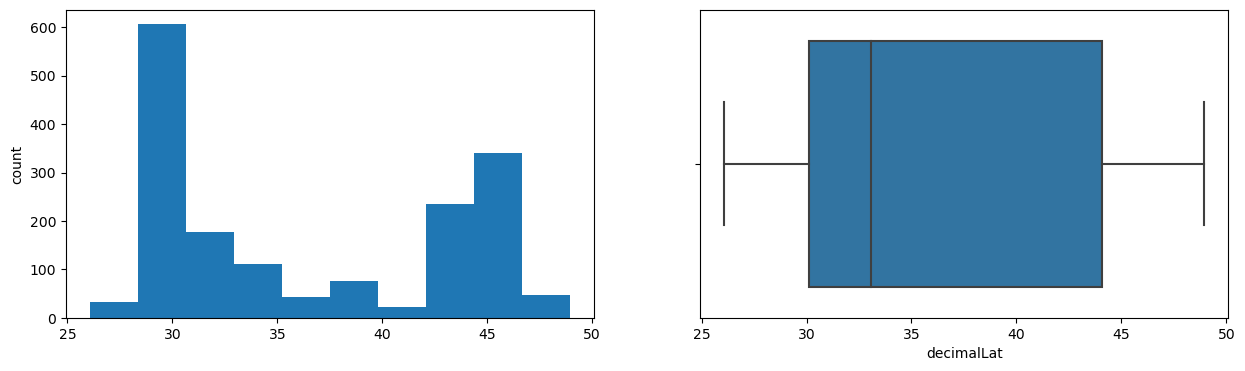

decimalLon
Skew : -0.24


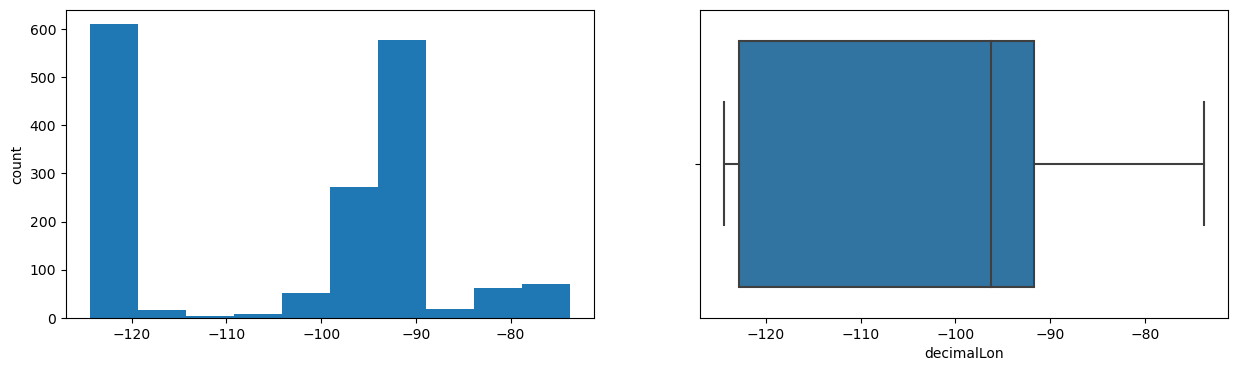

year
Skew : -0.46


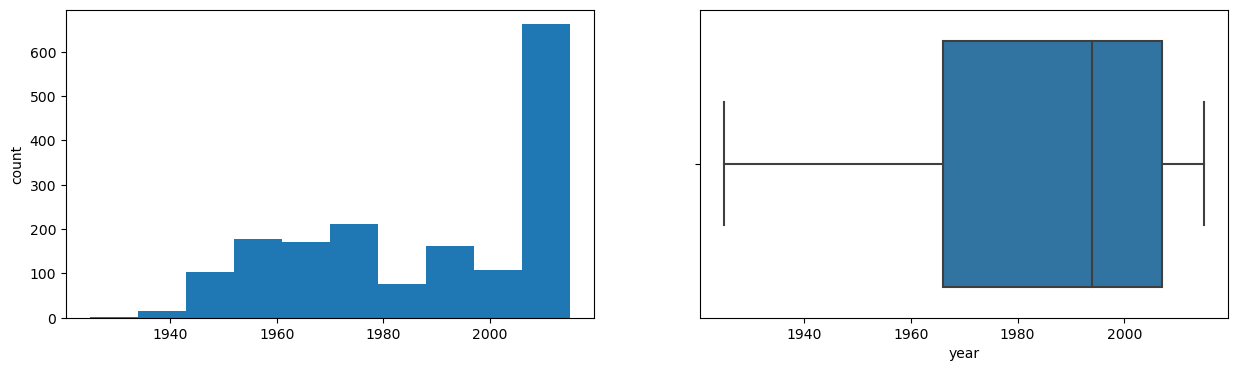

huc8skm
Skew : 0.77


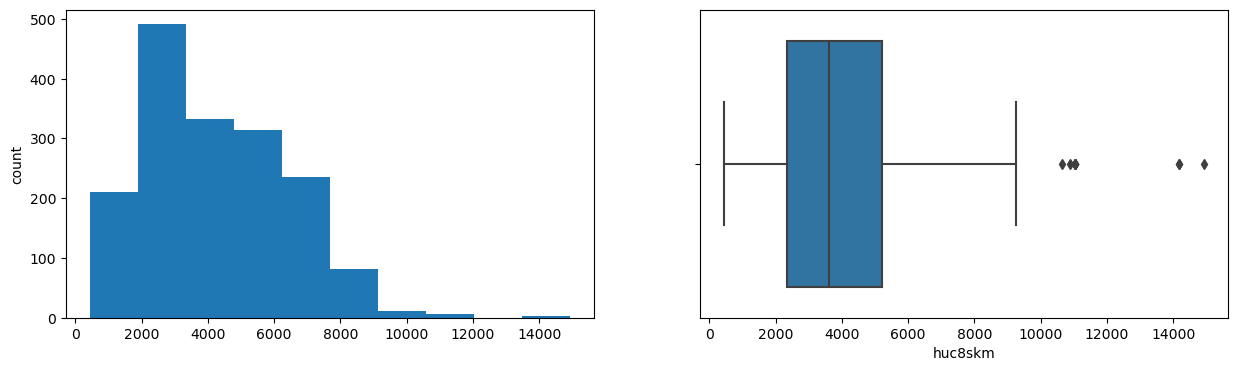

huc10skm
Skew : 7.95


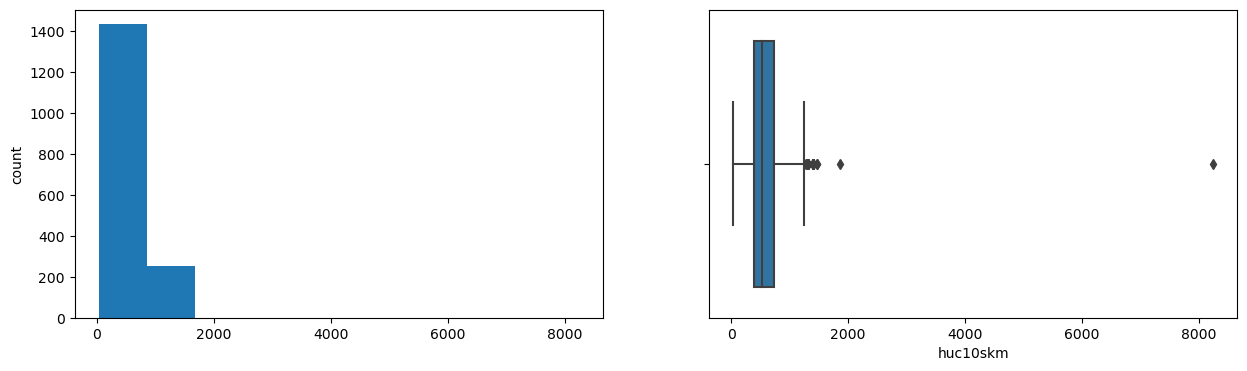

huc12skm
Skew : 30.94


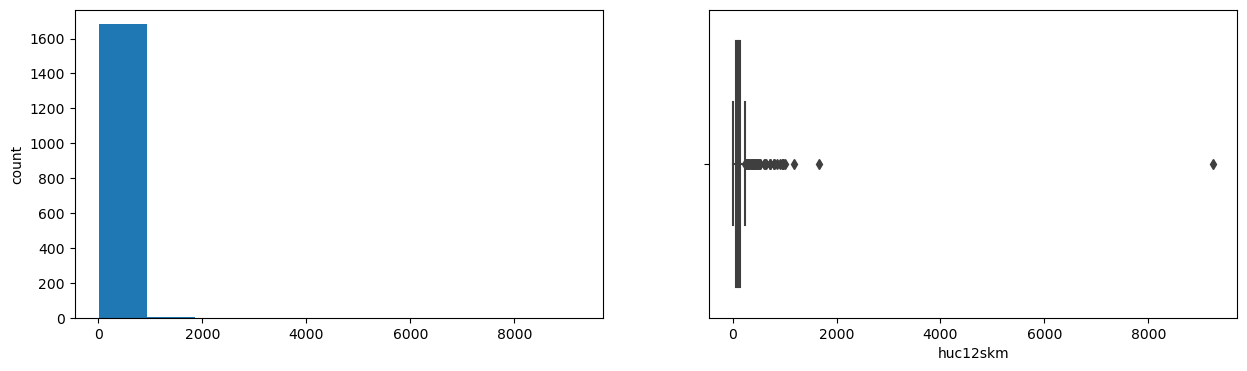

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

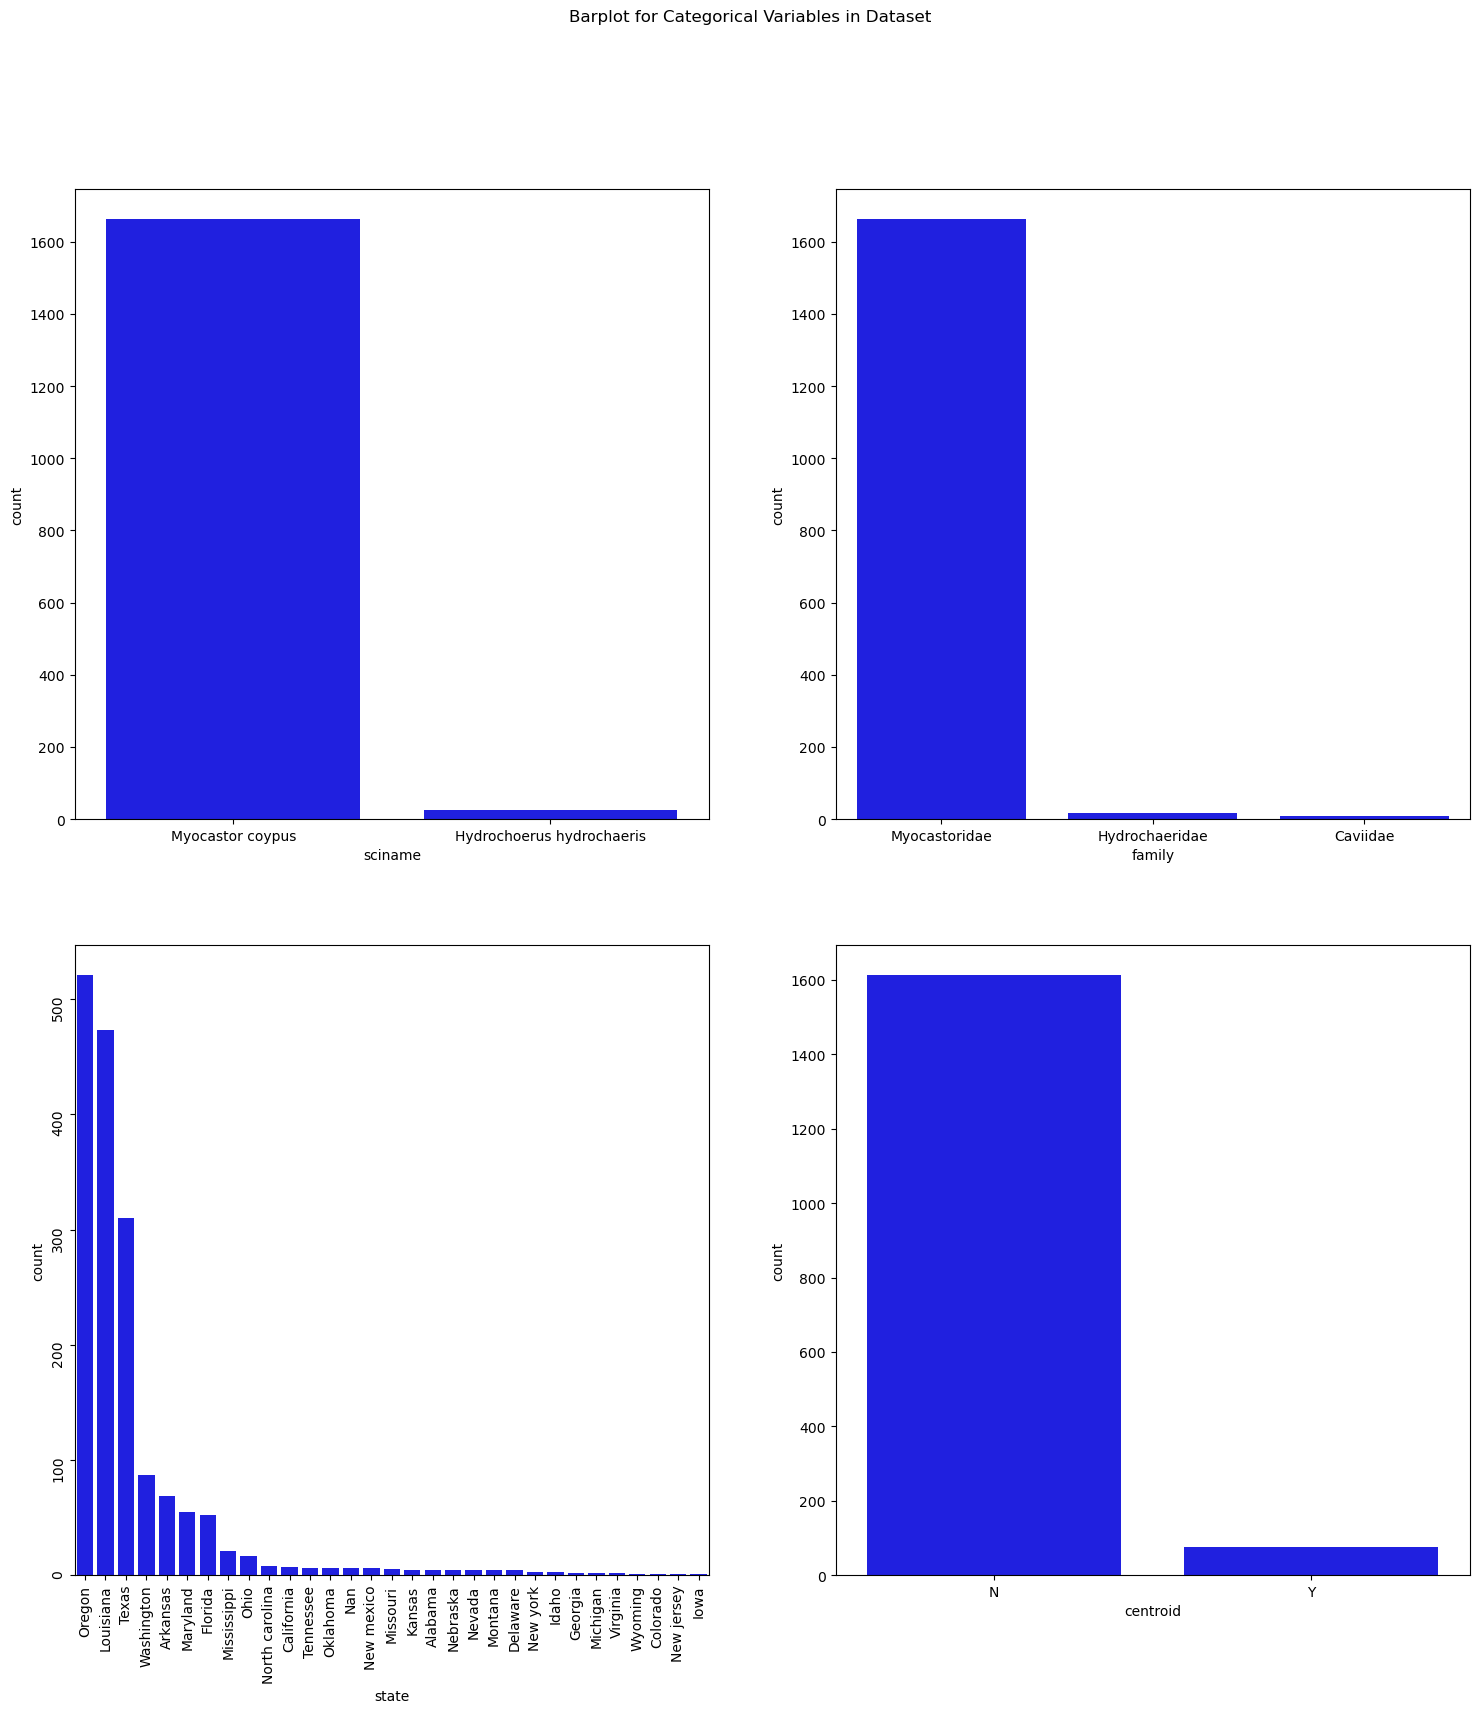

In [18]:
fig, axes = plt.subplots(2,2, figsize=(18,18))
fig.suptitle('Barplot for Categorical Variables in Dataset')

sns.countplot(ax=axes[0,0], x = 'sciname', data = df, color = 'blue',
             order = df['sciname'].value_counts().index);

sns.countplot(ax=axes[0,1], x = 'family', data = df, color = 'blue',
              order = df['family'].value_counts().index);

sns.countplot(ax = axes [1,0], x = 'state', data = df, color = 'blue',
             order = df['state'].value_counts().index);

sns.countplot(ax = axes [1, 1], x = 'centroid', data = df, color = 'blue',
             order = df['centroid'].value_counts().index);

axes[1][0].tick_params(labelrotation=90)

Visualizing the data allowed me to narrow down the species I will focus on for this project -- Myocastor coypus. I will filter the data even further now to focus only on this species. 

In [19]:
df = df[df['sciname'] == 'Myocastor coypus']
df.head()

,sciname,group,family,state,centroid,decimalLat,decimalLon,year,huc8skm,huc10skm,huc12skm
155317,Myocastor coypus,Mammals,Myocastoridae,Oregon,N,45.69288,-123.92207,1925,2213.54,283.470257,54.646125
155594,Myocastor coypus,Mammals,Myocastoridae,Washington,N,47.28871,-122.08900,1935,1257.91,551.457654,139.963882
155634,Myocastor coypus,Mammals,Myocastoridae,Ohio,N,41.17219,-81.25372,1936,2101.54,363.735295,116.569292
155635,Myocastor coypus,Mammals,Myocastoridae,Oregon,N,45.52345,-122.67600,1936,1053.18,314.806688,167.891121
155649,Myocastor coypus,Mammals,Myocastoridae,New mexico,N,33.76120,-104.31000,1937,10897.33,811.738178,155.002832


Since this dataset now only looks at Myocastor coypus, I can remove the columns 'sciname', 'group', and 'family'. 

In [20]:
df = df.drop(['sciname'], axis=1)
df = df.drop(['group'], axis=1)
df = df.drop(['family'], axis = 1)

In [21]:
df.head()

,state,centroid,decimalLat,decimalLon,year,huc8skm,huc10skm,huc12skm
155317,Oregon,N,45.69288,-123.92207,1925,2213.54,283.470257,54.646125
155594,Washington,N,47.28871,-122.08900,1935,1257.91,551.457654,139.963882
155634,Ohio,N,41.17219,-81.25372,1936,2101.54,363.735295,116.569292
155635,Oregon,N,45.52345,-122.67600,1936,1053.18,314.806688,167.891121
155649,New mexico,N,33.76120,-104.31000,1937,10897.33,811.738178,155.002832


### Data Transformation

Variables huc8skm, huc10skm, and huc12skm showed large skew and would be more useful log-transformed. 

In [22]:
# Create function for log transformation
def log_transform(data, col):
    for colname in col:
        if(data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [23]:
log_transform(df, ['huc8skm', 'huc10skm', 'huc12skm'])

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 155317 to 312055
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         1663 non-null   object 
 1   centroid      1663 non-null   object 
 2   decimalLat    1663 non-null   float64
 3   decimalLon    1663 non-null   float64
 4   year          1663 non-null   int64  
 5   huc8skm       1663 non-null   float64
 6   huc10skm      1663 non-null   float64
 7   huc12skm      1663 non-null   float64
 8   huc8skm_log   1663 non-null   float64
 9   huc10skm_log  1663 non-null   float64
 10  huc12skm_log  1663 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 155.9+ KB


<Axes: xlabel='log HUC8 (sq. km)', ylabel='Density'>

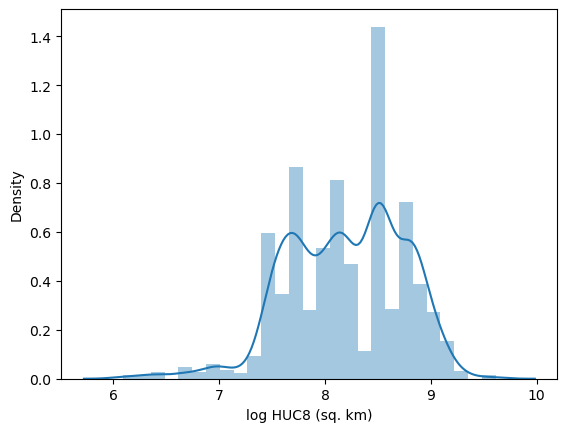

In [24]:
sns.distplot(df['huc8skm_log'], axlabel = 'log HUC8 (sq. km)')

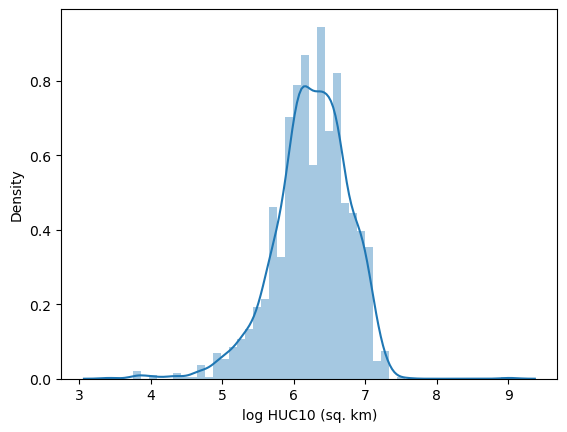

In [25]:
sns.distplot(df['huc10skm_log'], axlabel = 'log HUC10 (sq. km)');

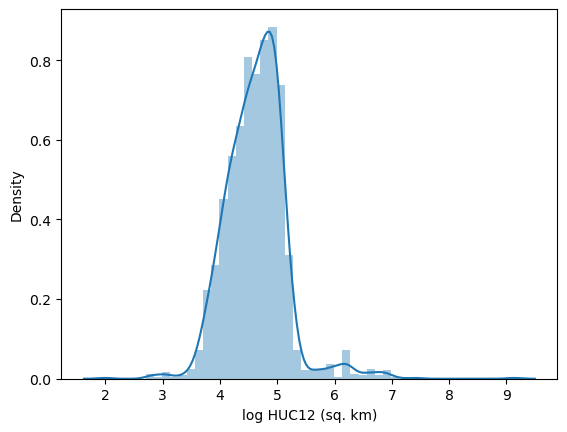

In [26]:
sns.distplot(df['huc12skm_log'], axlabel = 'log HUC12 (sq. km)');

## Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

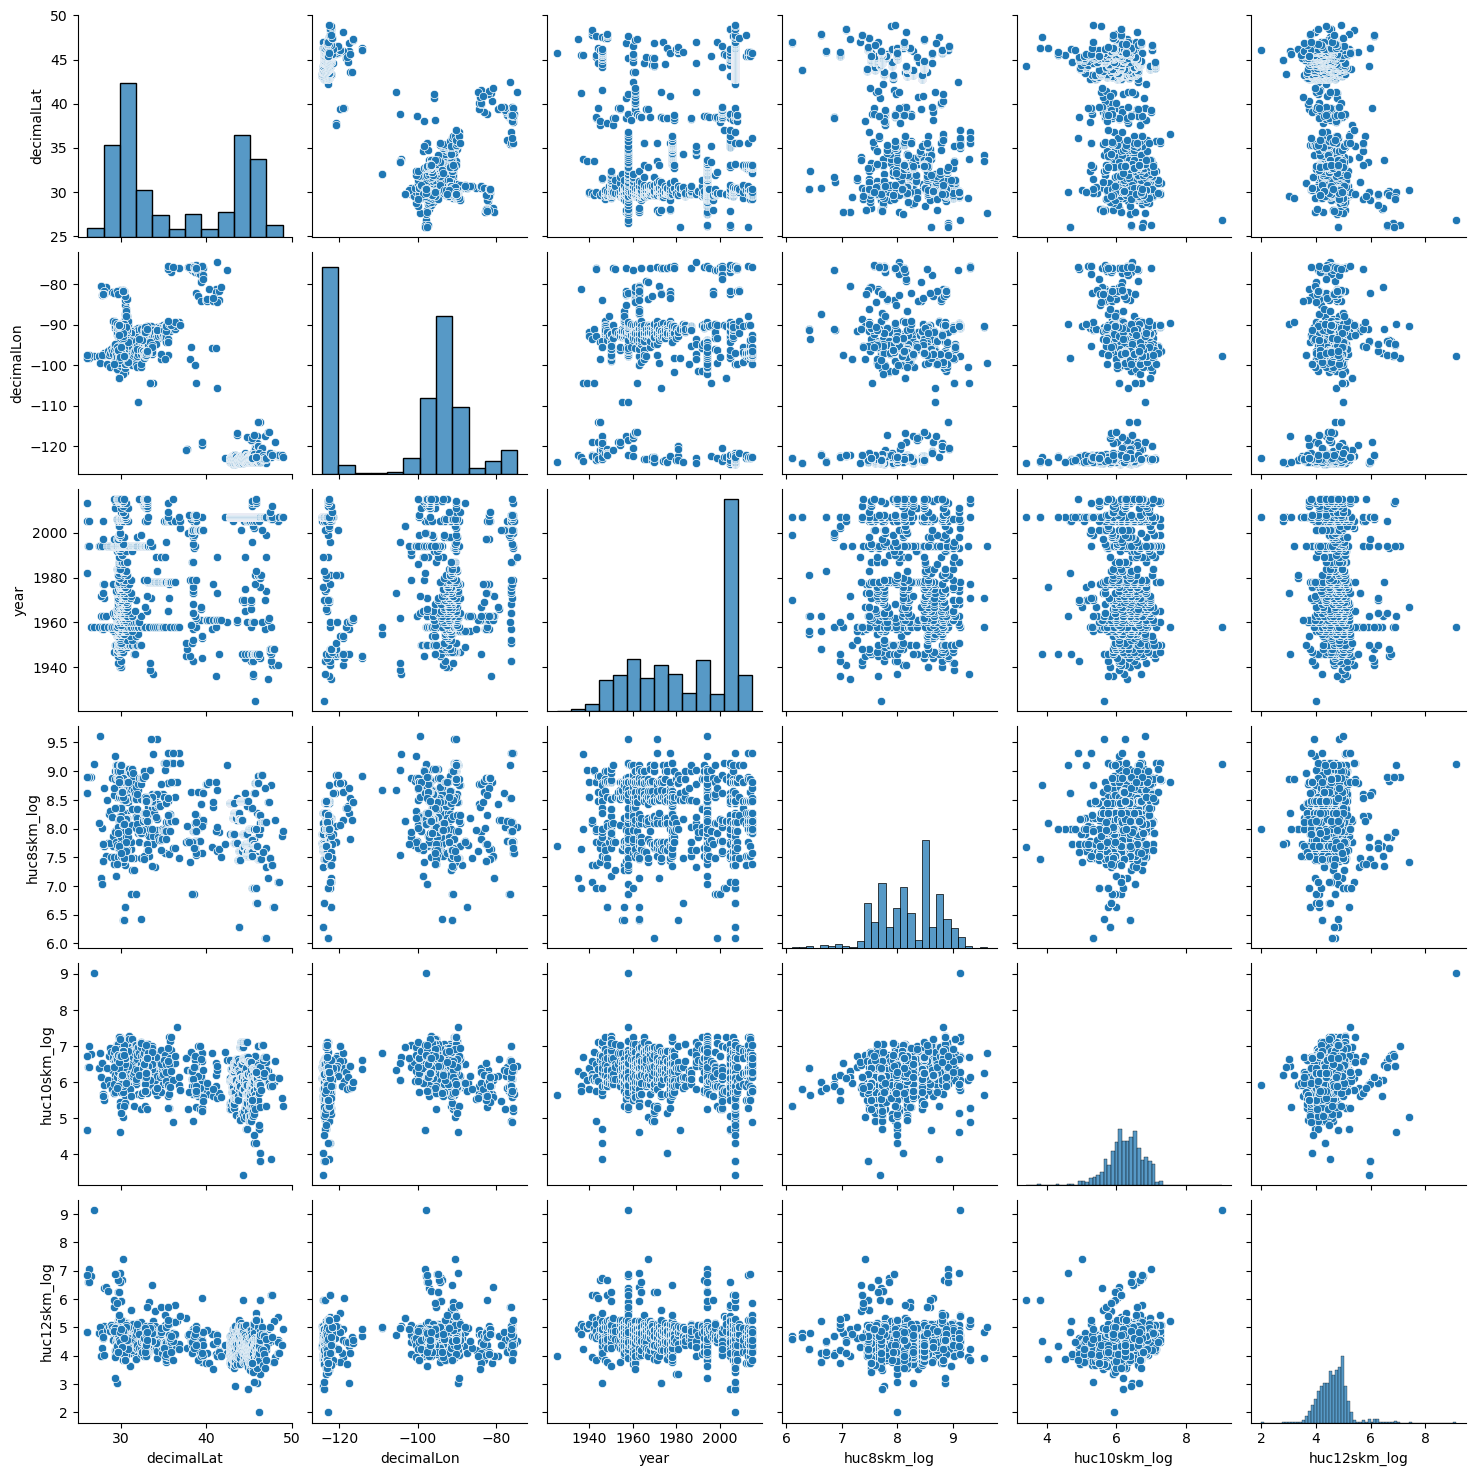

In [27]:
plt.figure(figsize = (13,17))
sns.pairplot(data = df.drop(['huc8skm', 'huc10skm', 'huc12skm'], axis=1))
plt.show()

# DSC 630 - Week 9
## Project Milestone 4
### Ashley Deibler

### Load Data

In [99]:
data = pd.read_csv('C:/Users/diggy/DSC630-Deibler/nutria_data.csv')
print(data.columns)

Index(['Specimen Number', 'Species ID', 'Group', 'Family', 'Scientific Name',
       'Common Name', 'Country', 'State', 'County', 'Locality', 'Latitude',
       'Longitude', 'Source', 'Accuracy', 'Drainage Name', 'HUC 8 Number',
       'Year', 'Month', 'Day', 'Status', 'Comments', 'record_type', 'disposal',
       'Museum_Cat_No', 'fresh_marine_intro', 'Reference 1', 'Type 1',
       'Date 1', 'Author 1', 'Title 1', 'Publisher 1', 'Location 1',
       'Reference 2', 'Type 2', 'Date 2', 'Author 2', 'Title 2', 'Publisher 2',
       'Location 2', 'Reference 3', 'Type 3', 'Date 3', 'Author 3', 'Title 3',
       'Publisher 3', 'Location 3', 'Reference 4', 'Type 4', 'Date 4',
       'Author 4', 'Title 4', 'Publisher 4', 'Location 4', 'Reference 5',
       'Type 5', 'Date 5', 'Author 5', 'Title 5', 'Publisher 5', 'Location 5',
       'Reference 6', 'Type 6', 'Date 6', 'Author 6', 'Title 6', 'Publisher 6',
       'Location 6'],
      dtype='object')


In [154]:
data.head()

,Specimen Number,Species ID,Group,Family,Scientific Name,Common Name,Country,State,County,Locality,...,Title 5,Publisher 5,Location 5,Reference 6,Type 6,Date 6,Author 6,Title 6,Publisher 6,Location 6
0,163922,1089,Mammals,Myocastoridae,Myocastor coypus,nutria,United States of America,TX,Hidalgo,Santa Ana National Wildlife Refuge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,250137,1089,Mammals,Myocastoridae,Myocastor coypus,nutria,United States of America,TX,Cameron,Cameron County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1735094,1089,Mammals,Myocastoridae,Myocastor coypus,nutria,United States of America,FL,Collier,Omitted by NAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,250161,1089,Mammals,Myocastoridae,Myocastor coypus,nutria,United States of America,TX,Hidalgo,Hidalgo County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,163886,1089,Mammals,Myocastoridae,Myocastor coypus,nutria,United States of America,TX,Cameron,Laguna Atascosa National Wildlife Refuge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [108]:
# Select relevent columns
features = data[['Specimen Number', 'Latitude', 'Longitude']]
labels = data['Scientific Name']

In [109]:
# Address missing values

features.isnull().sum()

Specimen Number    0
Latitude           0
Longitude          0
dtype: int64

### Population Growth Plot

### K-Means Cluster Model

In [216]:
from sklearn.metrics import silhouette_score, mean_squared_error, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import csv

In [116]:
K_clusters = range (2,10)

kmeans = [KMeans(n_clusters= i) for i in K_clusters]

y_axis = features[['Latitude']]
x_axis = features[['Longitude']]

score = [kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]

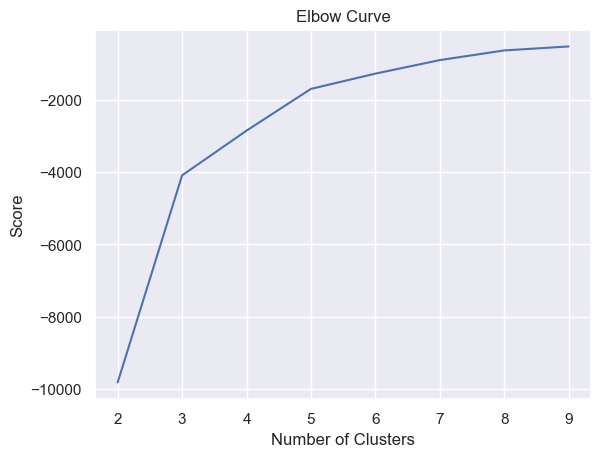

In [117]:
# Elbow Curve to Determine Number of Clusters

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Based on the Elbow Curve, the optimal number of clusters is 4, as the graph levels off steadily at that point. 

In [214]:
y = features['Latitude'].values
x = np.arange(len(features['Longitude'])).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=70)
k_means = KMeans(n_clusters=4, init='k-means++')
k_means.fit(X_train, y_train)

features['Cluster Label'] = kmeans.fit_predict(features[features.columns[1:3]])
centers = k_means.cluster_centers_
y_pred = k_means.predict(X_train)

features.head()

,Specimen Number,Latitude,Longitude,Cluster Label
0,163922,26.069700,-98.145000,2
1,250137,26.117020,-97.516900,2
2,1735094,26.152310,-81.703470,3
3,250161,26.242291,-98.159799,2
4,163886,26.283300,-97.383300,2


In [202]:
silhouette_score(X_train, y_pred)

0.5703323029082833

A silhouette score of 0.57 is acceptable enough in displaying that the clusters in this model aren't overlapping

In [217]:
davies_bouldin_score(X_train, y_pred)

0.5002604029680108

A DB Index of 0.50 indicates that our model is efficient at producing good clusters, as it is very close to 0. 

### Visualizing the Model

IndexError: index 1 is out of bounds for axis 1 with size 1

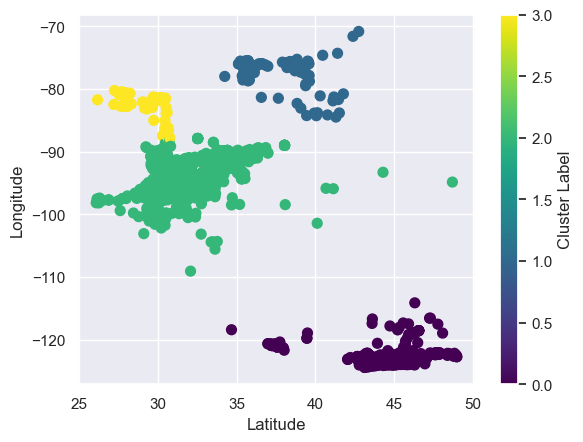

In [215]:
features.plot.scatter(x = 'Latitude', y = 'Longitude', c = 'Cluster Label', s = 50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 200, alpha=0.5)

In [144]:
!pip install folium
import folium

In [256]:
map_center = [features['Latitude'].mean(), features['Longitude'].mean()]
nutria_map = folium.Map(location=map_center, zoom_start=4)

colors = ['purple', 'blue', 'green', 'yellow']
for index, row in features.iterrows():
    folium.CircleMarker(
    location=[row['Latitude'], row['Longitude']],
    radius = 5,
    color = colors[row['Cluster Label'].astype(np.int64)],
    fill = True,
    fill_color=colors[row['Cluster Label'].astype(np.int64)],
    fill_opacity=0.7
    ).add_to(nutria_map)
    
nutria_map